# Usage Examples

### MSU D2L Instructor API

This project has been created as a part of CMSE495: Experiential Learning in Data Science at Michigan Sate University. This course is the capstone for the data science major and provides the opportunity for students to work in teams on a sponsored project as a culmination of the skills they have learned.

The sponsor for the D2L Instructor API project is Michigan State University. MSU uses the Desire 2 Learn (D2L) system for learning management. As instructors and educational researchers, our sponsors often work with D2L quiz and survey data to extract valuable insights about their instruction and students’ performance. However, the current process to export that data is inefficient, and the format of the data is not well suited to their needs. While each instructor could reformat the data themselves, a reproducible, consistent, and automated process would be beneficial and allow more instructors to deliver data-driven instruction. Our sponsors identified this need and have asked for our help meeting it with a D2L API tool. 

This notebook shows code-based basic usage examples of our quiz and survey conversion functions. For a more intuitive and interactive experience, please use the given example data to check out our Widget-Based GUI or our Figures notebook. 


### Imports

To run our software, you will need the pandas module and the numpy module. These are imported below. For more complex functions (visualization) in our other notebook, you may need additional libraries such as matplotlib or ipywidgets.

In [ ]:
# Imports and Pathing (for import of functions)

# importing pandas library
import pandas as pd


# importing numpy library
import numpy as np

# allowing our notebook to access functions from other directories
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# used this as reference for this process
# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im

To import our library of functionality, you will use the follow code chunk. There are several different directories within our source code with different functions. The most important ones are Final_Quiz and Final_Survey, so we will start with importing those. 

As a note, every time you use functions from our library, you will have to reference the corresponding directory like so: ```Final_Quiz.completeQuiz()```. This will be demonstrated throughout this notebook. 

In [ ]:
from src.d2lapi import Final_Quiz, Final_Survey

# Input Data

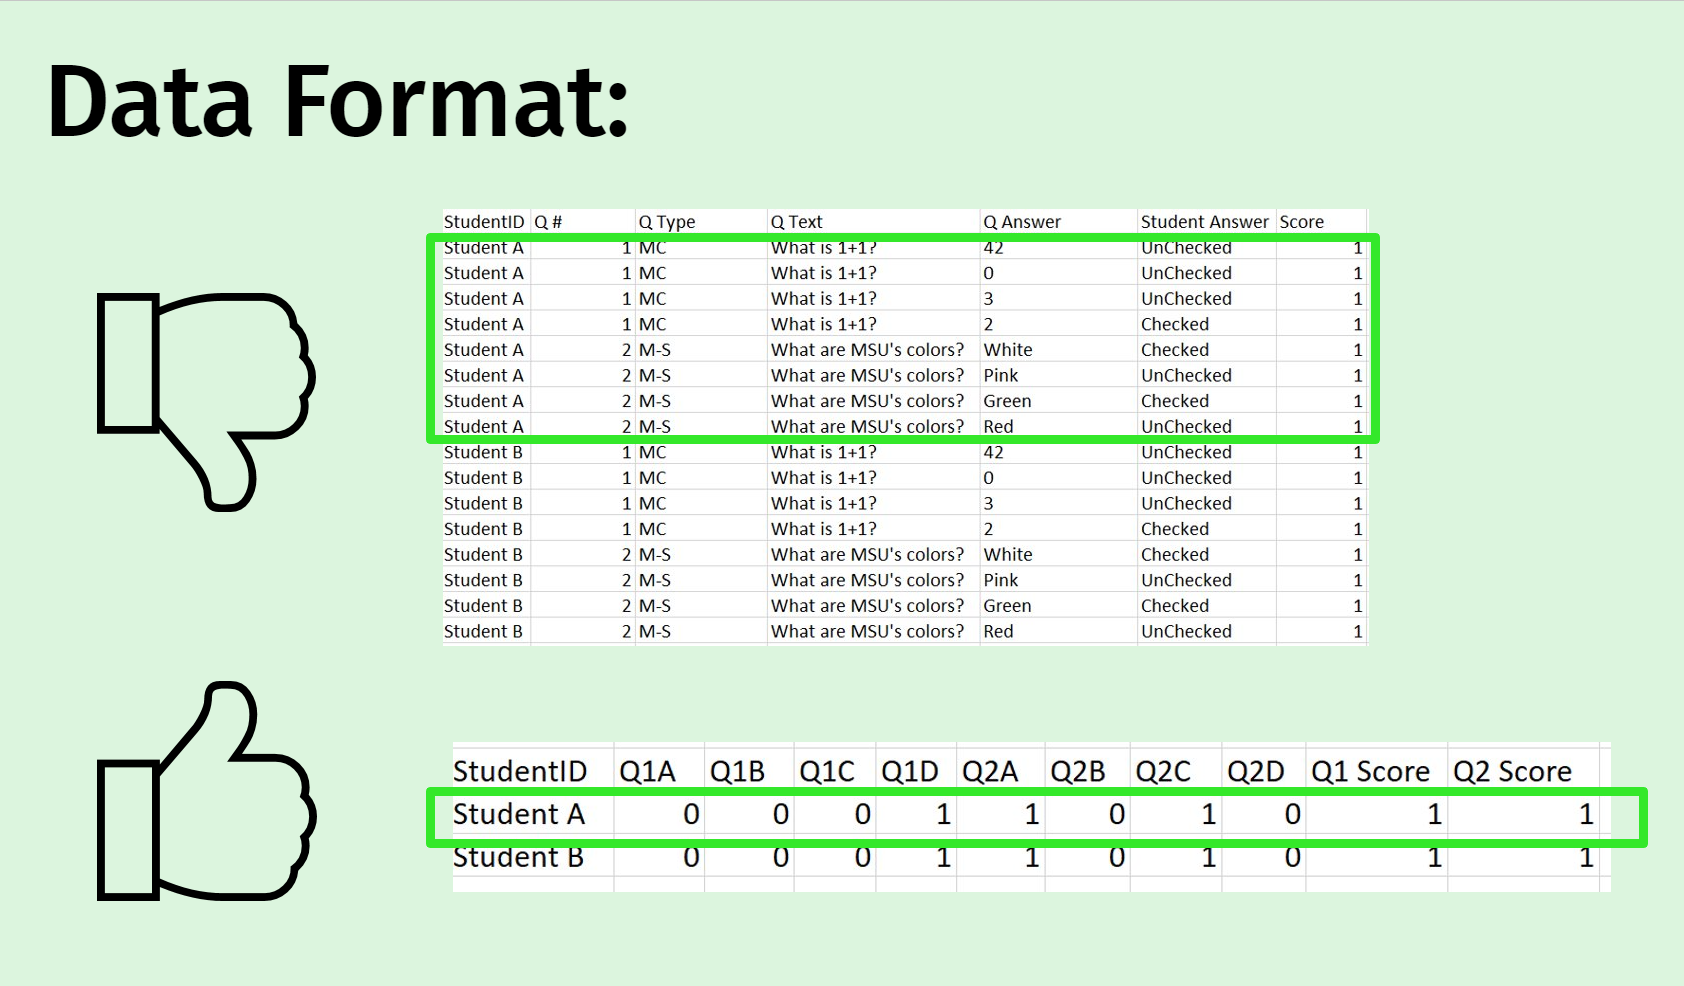

The purpose of this software is to reformat the quiz attempt data given by D2L. While there are existing options for exporting quiz and survey data from D2L, they are extremely unintuitive and require extensive cleaning and reformatting to be useful for analyzing individual student and class performance. This is the core problem behind our project and informs our technical process. Currently, data can be exported as a CSV file or an Excel file. In the simple example above, the green box highlights the data for one student.

The file contains a row for each student for each question for each answer choice. In other words, for each question, a student will have as many rows as there are answer options with a column for “checked” or “unchecked” indicating which choices they chose.    For instance, for this example, for a quiz with two questions with four answer choices each, each student will have at least 8 rows of data. The output also contains information like the question number, question type, where MC is multiple choice and M-S is multi select, answer choices, and score. This data format would be considered more of a “long“ data format, and is not compatible with research applications

Thus, our goal was to create a system that gives a more “wide” format version of this output, with one row for each student and a column for each answer choice for each question, without losing meaning or information from the data. For text-based questions, students’ answers will be the data value, and for other formats, binary data values will indicate what answer choices were selected. Further, this solution needs to be sustainable and flexible enough to work with any type of D2L quiz, varying by question types, length, etc. This system is demonstrated below. 

# D2L Quiz Data Conversion


## Example Data
To process student quiz data we must have two different csv forms in order to correctly run the code. The csv names will be <QUIZ_NAME>_ Attempt Details and <QUIZ_NAME>_ Question Details. These can be downloaded on D2L. Attempt Details will be found in Grades under the carrot next to the quiz you want details on. Question Details will be found in the Question Details Tab on View Statistics. View Statistics can be accessed in the carrot next to the quiz you want details on. For more information on this, please see our INSTALL.md or UsageRequirementsLimitations.md under 'Reports' in our repository.

For the purpose of this example, we will use the example data provided in our repository, which can be found in the "DataFiles" section of our repository. The files are named "ExampleData_QuizAttemptDetails.csv" and "ExampleData_AnswerKey.csv". Please ensure that these are downloaded to your local machine in the same directory as this notebook. 

We will set up the variables for the input files below.

### Attempt Data File

In [ ]:
# file path for example data
example_quiz_data_file = '../DataFiles/ExampleData_QuizAttemptDetails.csv'

In [ ]:
# taking a quick look at the format
pd.read_csv(example_quiz_data_file)

### Answer Key Data File

This data is used for some scoring methods, and most importantly, to append an answer key row along the top as if it were a student attempt. This was requested by our sponsors.

In [ ]:
# file path for example data
example_answer_key_file = '../DataFiles/ExampleData_AnswerKey.csv'

In [ ]:
# taking a quick look at the format
pd.read_csv(example_answer_key_file)

## Ready to Convert!

Our library has a simple all-in-one function to convert quiz data given the file name / path / csv contents of the two required data files. It is called ```completeQuiz``` and is in the Final_Quiz.py directory. It returns a pandas dataframe of the converted data, allowing you to continue manipulation in an environment like this notebook, or to download the .csv (see below). If you set the boolean parameter, qa_label_key, to True (default is false), then you will also output the question and answer label key as an additional dataframe. 


In [ ]:
# using our conversion function
# syntax is Final_Quiz.completeQuiz(attempt details, answer key)
converted_quiz_df, question_answer_label_quiz_df = Final_Quiz.completeQuiz(example_quiz_data_file, example_answer_key_file, qa_label_key = True)

In [ ]:
# take a look at the new format!
converted_quiz_df

In [ ]:
# take a look at the question and answer label key!
question_answer_label_quiz_df

## Downloading Reformatted Data as CSV

To download the newly converted data to a csv, run the following cell. If you'd like the new file name to be something different than what is already entered, change the argument of the ```df.to_csv()``` function.

In [ ]:
# downloading as csv
# the syntax is <dataframe name>.to_csv(<string of desired file name including csv>)

# downloading clean quiz data
converted_quiz_df.to_csv('ExampleConvertedQuizData.csv')

# downloading question and answer label key
question_answer_label_quiz_df.to_csv('ExampleQuestionAnswerLabelKey_QuizData.csv')

### All Done! Enjoy your reformatted quiz data!






# D2L Survey Data Conversion


## Example Data
To process survey data only one csv is required. Surveys, by nature, do not have right and wrong answers, so no answer key is needed. In order to get the csv the survey must be set up with reports before taking the survey. To do so you just select Add Report when creating a survey. The report can be given any name, but the report type must be individual attempts and you need to release reports to desired D2L roles. In order to process surveys the Report must be downloaded. It can be downloaded by selecting Reports in the carrot next to the survey you would like processed. For more information on this, please see our INSTALL.md or UsageRequirementsLimitations.md under 'Reports' in our repository.

For the purpose of this example, we will use the example data provided in our repository, which can be found in the "DataFiles" section of our repository. The file is named "ExampleData_Survey.csv". Please ensure that this file is downloaded to your local machine in the same directory as this notebook. 

We will set up the variable for the input file below.

### Survey Input Data File

In [ ]:
# file path for example data
example_survey_data_file = '../DataFiles/ExampleData_Survey.csv'

In [ ]:
# taking a quick look at the format
pd.read_csv(example_survey_data_file)

## Ready to Convert!

Our library has a simple all-in-one function to convert quiz data given the file name / path / csv contents of the two required data files. It is called ```completeSurvey``` and is in the Final_Survey.py directory. It returns a pandas dataframe of the converted data, allowing you to continue manipulation in an environment like this notebook, or to download the .csv (see below). If you set the boolean parameter, qa_label_key, to True (default is false), then you will also output the question and answer label key as an additional dataframe. 


In [ ]:
# using our conversion function
# syntax is Final_Quiz.completeQuiz(attempt details, answer key)
converted_survey_df, question_answer_label_survey_df = Final_Survey.completeSurvey(example_survey_data_file, qa_label_key = True)

In [ ]:
# take a look at the new format!
converted_survey_df

In [ ]:
# take a look at the question and answer label key!
question_answer_label_survey_df

## Downloading Reformatted Data as CSV

To download the newly converted data to a csv, run the following cell. If you'd like the new file name to be something different than what is already entered, change the argument of the ```df.to_csv()``` function.

In [ ]:
# downloading as csv
# the syntax is <dataframe name>.to_csv(<string of desired file name including csv>)

#downloading cleaned data
converted_survey_df.to_csv('ExampleConvertedSurveyData.csv')

# downloading question and answer label key
question_answer_label_survey_df.to_csv('ExampleQuestionAnswerLabelKey_SurveyData.csv')

### All Done! Enjoy your reformatted survey data!